In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [239]:
retail_df = pd.read_csv('../datasets/online_retail.csv', encoding='ISO-8859-1')

In [240]:
print('Fraction of missing values', retail_df.isnull().sum() / len(retail_df) * 100)
retail_df = retail_df.dropna()

Fraction of missing values InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


# Recency
# Frequency
# Monetary

In [241]:
retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
grouped_df = retail_df.groupby('CustomerID')['Amount'].sum()
grouped_df = grouped_df.reset_index()

In [242]:
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [243]:
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')

In [244]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [245]:
retail_df['Recency'] = retail_df['InvoiceDate'].max() - retail_df['InvoiceDate']
retail_df['Recency'] = retail_df['Recency'].dt.days

In [246]:
last_purchased = retail_df.groupby('CustomerID')['Recency'].min().reset_index()
grouped_df = pd.merge(grouped_df, last_purchased, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [247]:
rfm_df = grouped_df[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
scaled_rfm_df  = scaler.fit_transform(rfm_df)

In [248]:
scaled_rfm_df = pd.DataFrame(scaled_rfm_df)
scaled_rfm_df.columns = ['Amount', 'Frequency', 'Recency']

In [249]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_rfm_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

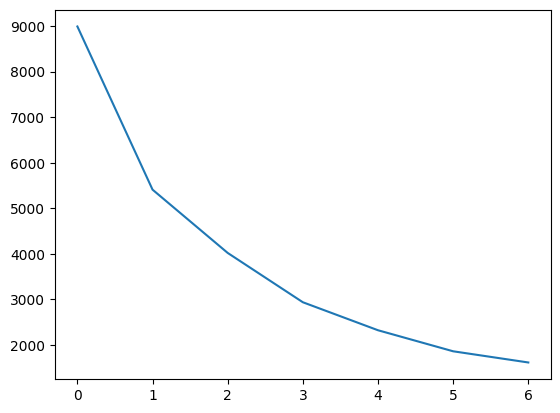

In [250]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_rfm_df)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [251]:
# silhoutte analysis
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(scaled_rfm_df)
    cluster_labels = kmeans.labels_
    silhouette_score_avg = silhouette_score(scaled_rfm_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is: {1}".format(n_clusters, silhouette_score_avg))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is: 0.9344641162235822


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is: 0.6003883114752382


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is: 0.5980793882727446


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is: 0.6160117259955692


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is: 0.5856955818362631


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is: 0.5238467453014489


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is: 0.5038570810123673


In [253]:
kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(scaled_rfm_df)
grouped_df['cluster_id'] = kmeans_final.labels_
grouped_df.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Amount,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<Axes: xlabel='cluster_id', ylabel='Amount'>

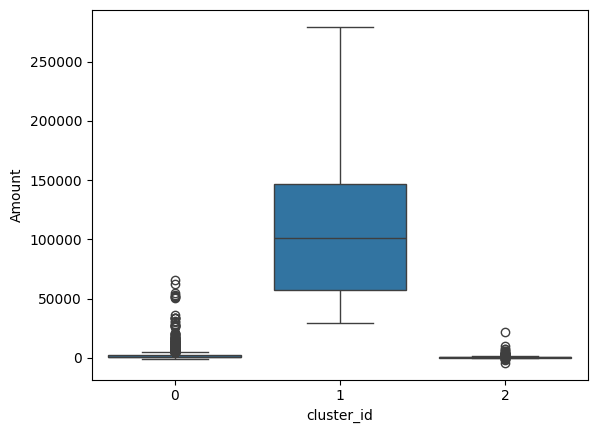

In [255]:
sns.boxplot(x='cluster_id', y='Amount', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='Recency'>

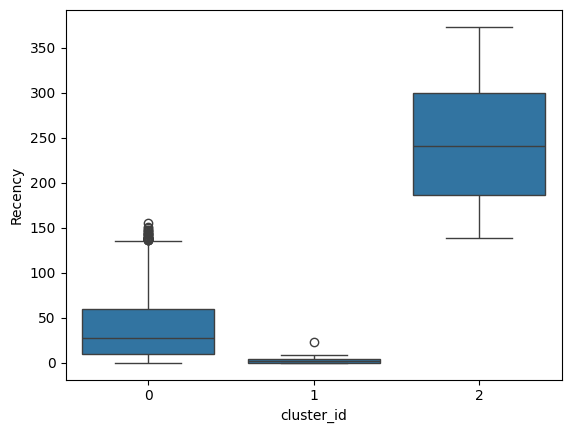

In [256]:
sns.boxplot(x='cluster_id', y='Recency', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='Frequency'>

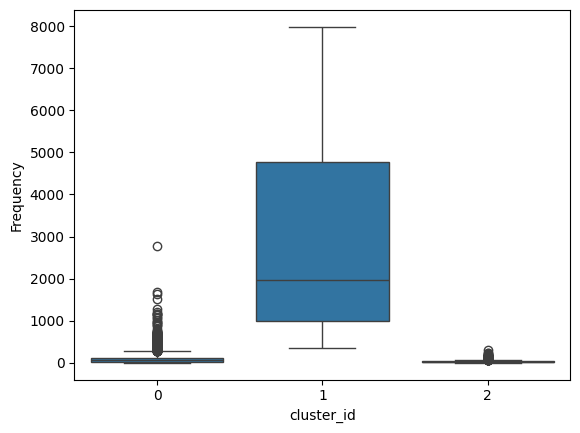

In [257]:
sns.boxplot(x='cluster_id', y='Frequency', data=grouped_df)